# Electron in a finite potential well
### Author - Guner Aygin
##### Date - 4/10/2020

### Ojectives:

##### This was a small assignment undertaken in my second year studying Physics. 
##### The aim of this assignment is to find the bound state energy eigenvalues (meaning $E < V_0$) for an electron subject to the potential: 

$ V(x) = \begin{cases} 
      V_0, & |x| \geq \frac{a}{2} \\
      0, & |x| \lt \frac{a}{2}
   \end{cases}
$

where $a$ is the cell width, and $V_0$ is the potential.

In [1]:
# We can choose any value for a and V0

a = 1.75e-9 # metres
V0 = 2.49 # eV

## Part 1
We plot the potential well using the code below.

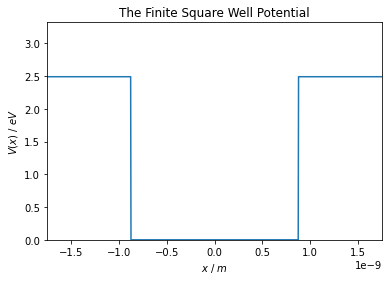

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-a, a, num=1000)

# Each point of x is mapped to V0 if abs(x) >= a / 2 and 0 otherwise
potential_array = np.piecewise(x, [abs(x) >= a / 2, abs(x) < a / 2],[V0, 0]) # --> np.piecewise evaluate to V0 when condition is True, or 0 when False

plt.title('The Finite Square Well Potential')
plt.xlabel(r'$x$ / $m$')
plt.ylabel(r'$V(x)$ / $eV$')

plt.axis([np.amin(x), np.amax(x), 0, 4/3*np.amax(potential_array)]) # --> # np.amin and np.amax return the maximum and minimum values of an array respectively
plt.plot(x, potential_array)
plt.show()

For an electron in this potential, one can define a dimensionless parameter $\chi$ (not related to the coordinate $x$ above!) related to the energy $E$ as

$\chi=\displaystyle \frac{a}{\hbar}\sqrt{\frac{mE}{2}}.$

Here $a$ is the well width, $\hbar$ is the reduced Planck's constant, and $m$ is the mass of the electron, all in SI units. It can be shown (see Quantum Mechanics 2) that finding the energy eigenvalues reduces to finding the values of $\chi$ that satisfy one of the following equations:

$\tan \chi = \frac{\sqrt{\lambda_0 - \chi^2}}{\chi}, \quad\quad (1)$

$-\cot \chi = \frac{\sqrt{\lambda_0 - \chi^2}}{\chi}, \quad\quad (2)$

where $\lambda_0 = ma^2V_0 / 2\hbar^2$ is a dimensionless constant dependent on the well parameters. Equation (1) yields energy eigenvalues whose wavefunctions are even, whilst equation (2) corresponds to the energies of odd wavefunctions.

These equations are transcendental, and numerical methods must be employed to obtain the solutions. Here we utilise the ```bisect``` method available in the SciPy library, and can be loaded from the `scipy.optimize` module. We have provided a simple example for using the `bisect` method in the example notebook ```scipy_bisect_example.ipynb```.

First task we define a function named `rhs(x)`, describing the right hand side of equations $(1)$ and $(2)$. The function should expect **one** argument, `x`, which is to be a NumPy array. It should then return a NumPy array containing the result of

$f(x)=\frac{\sqrt{\lambda_0 - x^2}}{x}$
applied elementwise to `x`. 

The dimensionless constant $\lambda_0$ is defined using your well parameters in the cell below. Be sure to reference this value in your `rhs` function.

Note: NumPy has already been imported as `np` in the second code cell.

In [3]:
# Import the necessary constants from scipy.constants module
from scipy import constants
e = constants.e # Elementary Charge
hbar = constants.hbar # Reduced Planck's constant
m = constants.m_e # Electron mass

# Do not alter this constant below (note the conversion of eV to Joules)
lambda_0 = (m*(a**2)*V0*e)/(2*constants.hbar**2) 

def rhs(x):
    ''' defining rhs function '''
    return np.sqrt(lambda_0 - x**2)/x

To check that `rhs` is working correctly we test that

$f(\sqrt{\lambda_0/2}) = 1, ~~~~ f(\sqrt{\lambda_0/5}) = 2.$

In [4]:
rhs(np.array([np.sqrt(lambda_0/2), np.sqrt(lambda_0/5)]))

array([1., 2.])

## Part 2

In order to perform the bisection method, we require an interval which is known to contain a solution. Choosing this interval is straightforward if the relevant functions are represented graphically. This motivates this next task. 

In the following cell, use `matplotlib.pyplot` (already imported as `plt`) to plot the following three functions:

$\tan x, ~~~~~~~ -\cot x, ~~~~~~~ f(x)=\frac{\sqrt{\lambda_0 - x^2}}{x},$
 
on the **half-open** interval $\big[0.1,\sqrt\lambda_0\big)$.

We limit the range of values displayed on the $y$ axis to discern suitable intervals upon which to perform the bisection method (Part 4). It can also be useful to try interactive plot windows to zoom in on the crossing points.

[]

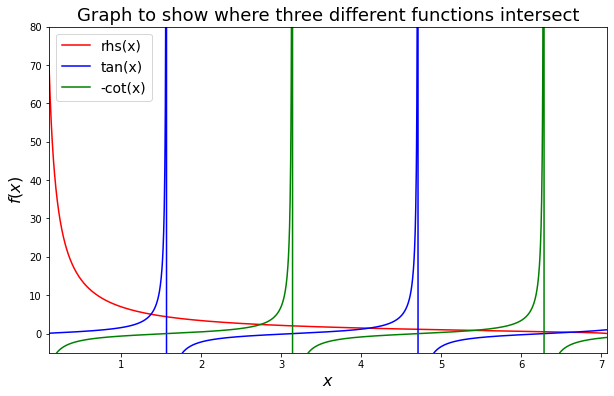

In [5]:
# Creating the figure
student_figure = plt.figure(figsize=(10,6)) 
x = np.linspace(0.1, np.sqrt(lambda_0), 2000, endpoint=False)
plt.xlabel(r'$x$', fontsize=16) 
plt.ylabel(r'$f(x)$', fontsize=16) 
plt.axis([np.amin(x), np.amax(x), -5, 80])
plt.plot(x, rhs(x), 'r', label='rhs(x)')
plt.plot(x, np.tan(x), 'b', label='tan(x)')
plt.plot(x, (-1/np.tan(x)), 'g', label = '-cot(x)')
plt.title("Graph to show where three different functions intersect", fontsize=18)
plt.legend(fontsize=14)
plt.plot()

## Part 3

Next, we define two more functions called `even_equation` and `odd_equation`. These should each take a NumPy array as their only argument and return a NumPy array containing the result of

$f_{\rm even}(x) = \tan x - \frac{\sqrt{\lambda_0 - x^2}}{x}$
and
$f_{\rm odd}(x) = \cot x + \frac{\sqrt{\lambda_0 - x^2}}{x}$
applied elementwise to the input array, correspondingly.

In [6]:
def even_equation(x):
    return np.tan(x) - rhs(x)

def odd_equation(x):
    return 1/np.tan(x) + rhs(x)

## Part 4

Employing the `even_equation` and `odd_equation` functions defined in part 3, and making multiple calls to the `bisect` method on suitable intervals, we can find the three smallest solutions of equations $(1)$ and $(2)$ taken together. In other words, find the values of $x$ corresponding to the first three energy eigenvalues. 

In [7]:
import scipy.optimize as optimize

solution_list = []

''' Note: the bisector values need to be manually changed for different values of a and V0 '''
first_solution = optimize.bisect(even_equation, 1.2, 1.4) # where rhs(x) first intercepts tan(x)
solution_list.append(first_solution)  
second_solution = optimize.bisect(odd_equation, 2.5, 2.9) # where rhs(x) first intercepts -cot(x)
solution_list.append(second_solution) 
third_solution = optimize.bisect(even_equation, 3.8, 4.4) # where rhs(x) second intercepts tan(x)
solution_list.append(third_solution) 

## Part 5

The final part is to write a function named `find_energy` which takes the **previously generated, ordered list** of $x$ solutions as a parameter. It should return a new list containing the three desired energy eigenvalues expressed in units of eV. 

In [8]:
# Write the function find_energy here
def find_energy(x):
    ''' return the values of energy that we get from the
        x values in solution_list'''
    x_values = np.array(x)                     # <--- must first convert the list in Task 4 into an array so it can be operated on    
    energy_values = []                         # <--- empty list to append later
    for x in x_values:
        E_SI = (2*(x**2)*(hbar**2))/((a**2)*m) # <--- finds Energy in SI units
        E_eV = E_SI/e                          # <--- converts Energy from SI units to eV
        energy_values.append(f'{E_eV:.3f}')    # <--- appends values of E_eV to the list with 3 decimal places 
        
    return energy_values

In [9]:
energy_solutions = find_energy(solution_list)

for i, energy in enumerate(energy_solutions):
    print('Energy eigenvalue {} is E = {} eV'.format(i, energy))

Energy eigenvalue 0 is E = 0.094 eV
Energy eigenvalue 1 is E = 0.375 eV
Energy eigenvalue 2 is E = 0.834 eV


There we have the three lowest energy eigenvalues for our problem. We can change $a$ and $V_0$ to see how the values change based on different parameters